In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df[df.duplicated()].sum()

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df = df.rename(columns={'Genre':'Gender'})

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
x = df.iloc[:,3:]

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

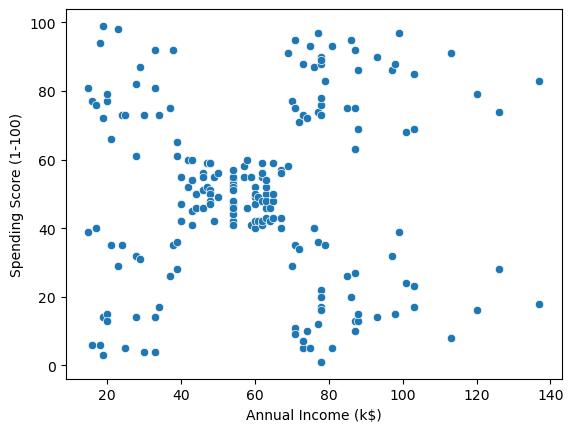

In [14]:
sns.scatterplot(x = df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

In [15]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
x.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
x.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [18]:
x.duplicated().sum()

4

In [19]:
x[x.duplicated(keep=False)]

,Annual Income (k$),Spending Score (1-100)
48,40,42
49,40,42
65,48,59
68,48,59
129,71,75
131,71,75
156,78,1
158,78,1


In [20]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [22]:
sc= StandardScaler()

In [23]:
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [24]:
x

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans()

In [27]:
cluster = km.fit_predict(x)

In [28]:
cluster

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 4,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 6, 1, 6, 1,
       0, 1, 6, 1, 6, 1, 6, 1, 6, 1, 0, 1, 6, 1, 0, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 0, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7])

# Elbow Graph

In [29]:
#variance with[wcss] - within cluster sum of squares/inertia

In [30]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    wcss.append(km.inertia_)

In [31]:
wcss

[400.0,
 270.89235946739046,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 45.33255486071674,
 37.21509197608593,
 32.33081392367577,
 29.193145383499328,
 26.68905546925459,
 24.215508773013944,
 21.63832127521351,
 19.985614300410152,
 17.625728620157957,
 16.236921907476656,
 15.347815431197818,
 13.692863954889962,
 12.90215406272218]

Text(0, 0.5, 'WCSS')

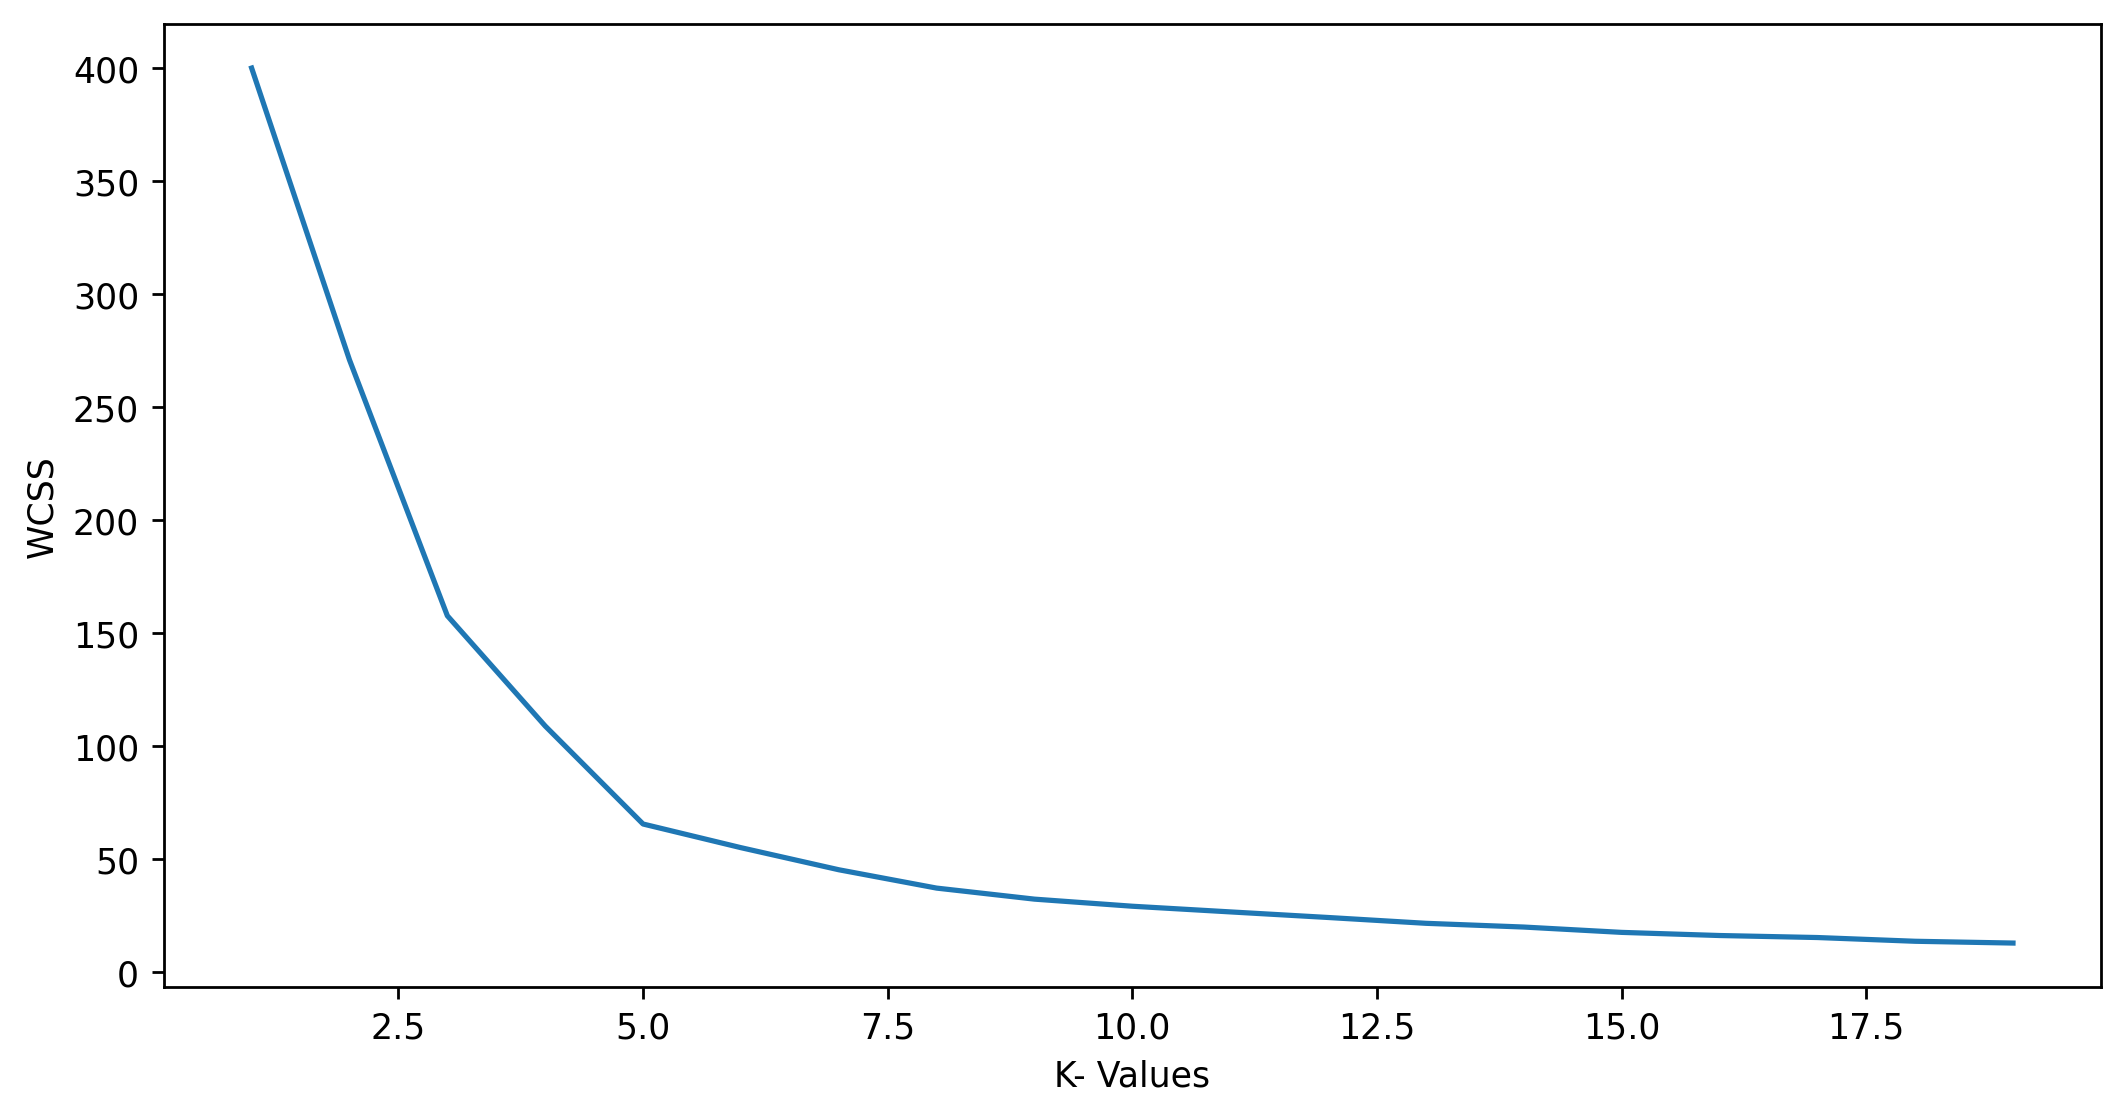

In [32]:
plt.plot(range(1,20),wcss)
plt.xlabel("K- Values")
plt.ylabel('WCSS')

In [33]:
km = KMeans(n_clusters=5)
ylabel = km.fit_predict(x)

In [34]:
ylabel

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [35]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788]])

In [36]:
x['Cluster'] = ylabel

In [37]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


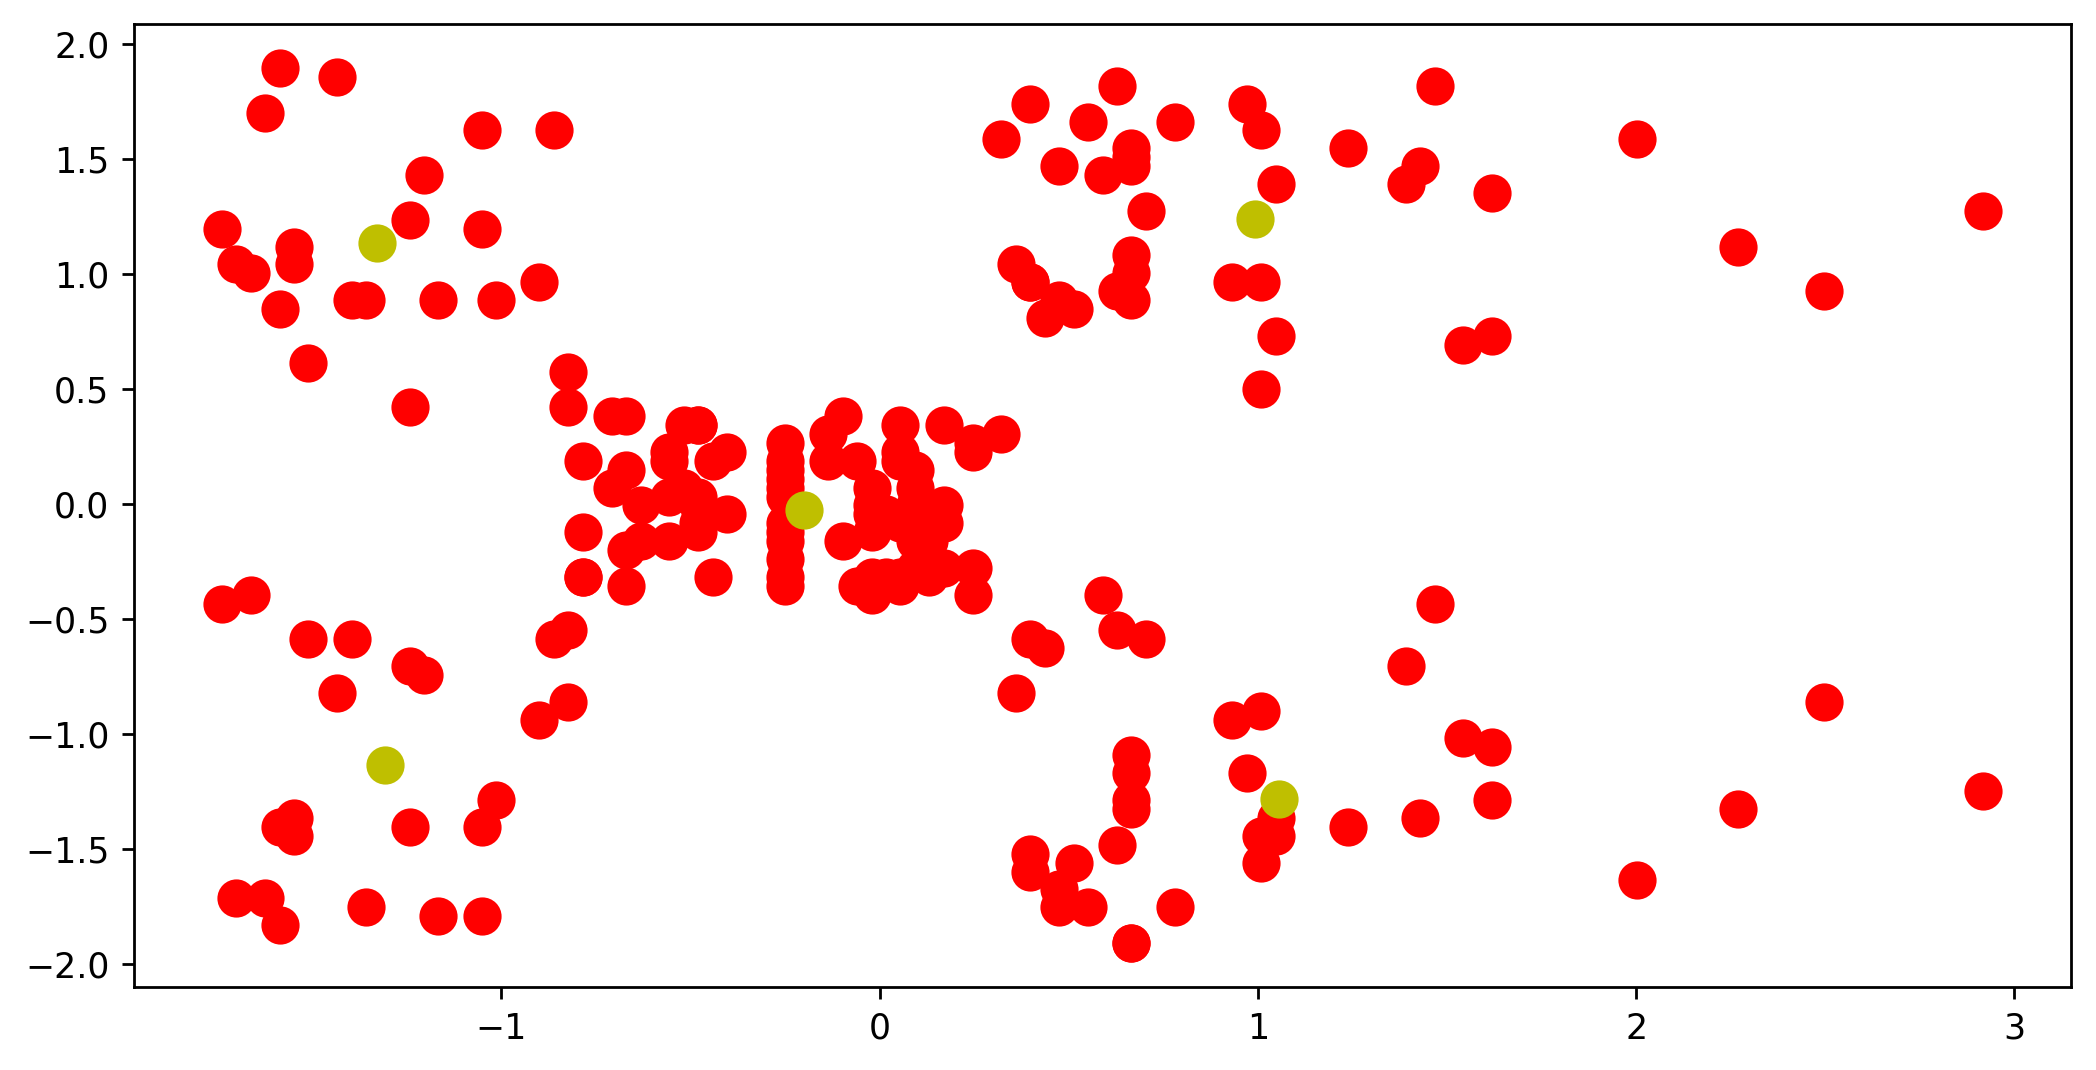

In [38]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],s = 100,c = 'r')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'y',s=100)

In [39]:
df.drop(columns=['CustomerID'],inplace=True)

In [40]:
df['Cluster'] = ylabel

In [41]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,2


In [42]:
df.groupby('Cluster').agg('mean')

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


In [46]:
x1 = x.iloc[:,:2]

In [47]:
y = x.iloc[:,-1]

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.25,random_state=1)

In [49]:
lg = LogisticRegression()

In [50]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [51]:
ypred = lg.predict(xtest)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00         7
           2       1.00      0.90      0.95        10
           3       0.81      1.00      0.89        17
           4       1.00      0.86      0.92         7

    accuracy                           0.92        50
   macro avg       0.96      0.91      0.93        50
weighted avg       0.94      0.92      0.92        50



# Thank You!